In [107]:
from numpy import *
from matplotlib.pyplot import *

def coins(Matrix):
    if Matrix == "H":
        coin = array([[1/sqrt(2) , 1/sqrt(2)],[1/sqrt(2) , -1/sqrt(2)]])
    elif Matrix == "X":
        coin = array([0,1],[1,0])
    return coin

def init_state(N,P,CoinState):
    initstate = zeros((N,1))
    initstate[P][0] = 1
    g = kron(CoinState,initstate)
    return g

def init_coin(init):
    if init == "0":
        psi0 = array([[1],[0]])
    if init == "1":
        psi0 = array([[0],[1]])
    if init == "01":
        psi0 = array([[1/sqrt(2)],[(-1*1j)/sqrt(2)]])
    return psi0

def walk_op(N,state0,state1):
    c00= outer(state0,state0)
    c01= outer(state0,state1)
    c10= outer(state1,state0)
    c11= outer(state1,state1)
    ShiftPlus = roll(eye(N),1,axis=0)
    ShiftMinus = roll(eye(N),-1,axis=0)
    Shift = kron(c00,ShiftPlus) + kron(c11,ShiftMinus) 
    return Shift

def CU_op(coin, shift,N):
    U = shift.dot(kron(coin,eye(N)))
    return U

def final_state(U,psi0,steps):
    for t in range(0,steps):
        psi0=U.dot(psi0)
    return psi0

def prob_vec(psiN,N):
    probs = zeros((N,1))
    for x in range(N):
        probs[x]=psiN[x]*conjugate(psiN[x]) + psiN[N+x]*conjugate(psiN[N+x]) #duvida aqui
    return probs

def cqwalk(N,steps,coinstate):
    P = int((N+1)/2)
    state0 = array([1,0])
    state1 = array([0,1])
    Coin = coins("H")
    shift= walk_op(N,state0,state1)
    U = CU_op(Coin,shift,N)
    amp = array([1])
    psi0 = init_state(N,P,coinstate)
    psiN = final_state(U,psi0,steps)
    probvec = prob_vec(psiN,N)
    return probvec

> # Quantum Random Walks

Fazer introducao com Turing, algoritmos probabilisticos e random walk classica.

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
$$
The space of our quantum walk is composed by coin $\mathcal{H_C}$ and walker spaces $\mathcal{H_W}$, and we have $\mathcal{H} = \mathcal{H_C} \otimes \mathcal{H_W}$.
If the coin is tossed and rolls "heads", for example, the system transitions to position  $\ket{x+1}$ , otherwise it advances to  $\ket{x-1}$ .The coin is a unitary operator defined as

\begin{equation}
        \begin{cases}
                C\ket{0}\ket{x} = a\ket{0}\ket{x} + b\ket{1}\ket{x}\\
                C\ket{1}\ket{x} = c\ket{0}\ket{x} + d\ket{1}\ket{x},
        \end{cases}
\end{equation}

where  a ,  b ,  c  and  d  are the amplitudes associated with each outcome of the coin toss.

\begin{equation}
        C_H = \begin{pmatrix} 
                a & c\\
                b & d
            \end{pmatrix}
            =\frac{1}{\sqrt{2}} \begin{pmatrix}
                                        1 & 1\\
                                        1 & -1
                               \end{pmatrix},
\end{equation}


In [108]:
coin = array([[1/sqrt(2) , 1/sqrt(2)],
              [1/sqrt(2), -1/sqrt(2)]
             ])

We can describe the shift operator as

\begin{eqnarray}
    S\ket{0}\ket{x} &=& \ket{0}\ket{x+1}\\
    S\ket{1}\ket{x} &=& \ket{1}\ket{x-1} \nonumber
\end{eqnarray}
    
and S in the computational basis has the format
    \begin{eqnarray}
        S = \ket{0}\bra{0} \otimes \sum_{x} \ket{x+1}\bra{x}+ \ket{1}\bra{1} \otimes \sum_{x} \ket{x-1}\bra{x}&& 
    \end{eqnarray}

In [109]:
N = 200
c00 = outer(array([1,0]),array([1,0]))
c11 = outer(array([0,1]),array([0,1]))

ShiftPlus = roll(eye(N),1,axis=0)
ShiftMinus = roll(eye(N),-1,axis=0)

shift=kron(c00,ShiftPlus) + kron(c11,ShiftMinus)

It follows that the operator that describes the dynamics of the quantum walk will be given by

\begin{equation}
       U = S(C \otimes I_N) \quad \longrightarrow \quad S(C_H\otimes I)
\end{equation}

In [110]:
U = shift.dot(kron(coin,eye(N)))

Consider a quantum system located at  $\ket{x = 0}$  with coin state  $\ket{0}$ , for  $t=0$ . It's state will be described by

\begin{equation}
        \ket{\psi(0)} = \ket{0}\ket{x=0}.
        \label{eq:coinedQWInitCond0}
\end{equation}

Applying the unitary evolution operator $t$ times will result in state

\begin{equation}
      \ket{\psi(t)} = U^t\ket{\psi(0) }
\end{equation}

In [121]:
steps = 100
psi0 = init_state(N,int(N/2)+1,init_coin('0'))
for t in range(0,steps):
    psi0=U.dot(psi0)
    psiT = psi0

The probability distribution is then obtained by the Born rule
 
\begin{equation}
    p(\ket{\psi(t)}) = \lvert \ket{\psi(t)}  \rvert^2
\end{equation}


In [123]:
for x in range(N):
        probs = zeros((N,1))
        probs[x]=psiT[x]*conjugate(psiT[x]) + psiT[N+x]*conjugate(psiT[N+x])

Putting it all together, the _cqwalk_ function (available as notes in this notebook) returns a probability distribution ready to be plotted.

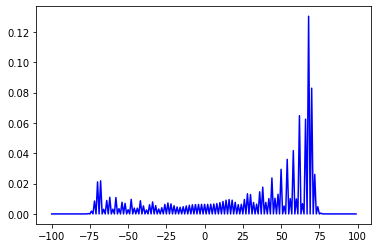

In [112]:
from IPython.display import HTML, display

N = 200
steps = 100

initcondcoin0 = init_coin('0')

qw0 = cqwalk(N,steps,initcondcoin0)

plot(arange(-N/2,N/2),qw ,'b')

The Hadamard operator flips the sign of state $\ket{1}$, hence more terms are cancelled when the coin state is $\ket{1}$. Since $\ket{0}$ was defined to _increment_ state $\ket{x}$, then it is obvious why there is a higher probability of finding the walker in the right-side of the graph.

Following this logic, it would be expected that an initial condition

\begin{equation}
        \ket{\Psi(0)} = \ket{1}\ket{x=0},
        \label{eq:coinedQWInitCond1}
\end{equation}

would result in more cancelations of terms when the coin state is $\ket{0}$, resulting in a drift towards the left-side.

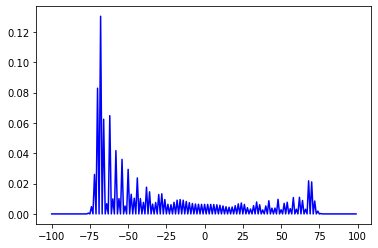

In [116]:
init1 = '1'
initcondcoin1 = init_cond(init1)
qw1 = cqwalk(N,steps,initcondcoin1)

plot(arange(-N/2,N/2),qw1 ,'b')

In order to obtain a symmetrical distribution, one must superpose the state in equation \ref{eq:coinedQWInitCond0} with the state in equation \ref{eq:coinedQWInitCond1}. However, in order to not cancel    terms before the calculation of the probability distribution, one must multiply state $\ket{1}$ with the imaginary unit, $i$

\begin{equation}
        \ket{\Psi(0)} = \frac{\ket{0}-i\ket{1}}{\sqrt{2}}\ket{x=0}.
        \label{eq:12}
\end{equation}


<ipython-input-107-d0808dd6647f>:48: ComplexWarning: Casting complex values to real discards the imaginary part
  probs[x]=psiN[x]*conjugate(psiN[x]) + psiN[N+x]*conjugate(psiN[N+x]) #duvida aqui


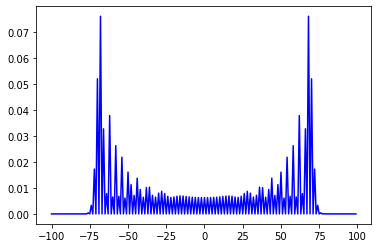

In [125]:
init01 = '01'
initcondcoin01 = init_cond(init01)
qw01 = cqwalk(N,steps,initcondcoin01)

plot(arange(-N/2,N/2),qw01 ,'b')

In [126]:
display(HTML("""
<video width="540" height="380" controls>
  <source src="QuantumWalk500.mp4" type="video/mp4">
</video>
"""))

The probability distribution is now symmetric and it is spread over the range $[-\frac{t}{\sqrt{2}},-\frac{t}{\sqrt{2}}]$ with peaks around $x \approx \pm \frac{t}{\sqrt{2}}$. This means that if t
he position of the walker was measured at the end, it would be equally probable to find him either in the left side or the right side of the graph, which is not possible in a classical diffusive motion.


Escrever sobre desvio padrao e aplicacoes da quantum walk discreta.

# References

(<a id="cit-mohseni08" href="#call-mohseni08">Mohseni, Rebentrost <em>et al.</em>, 2008</a>) Mohseni Masoud, Rebentrost Patrick, Lloyd Seth <em>et al.</em>, ``_Environment-assisted quantum walks in photosynthetic energy transfer_'', The Journal of Chemical Physics, vol. 129, number 17, pp. 174106, Nov 2008.  [online](http://dx.doi.org/10.1063/1.3002335)

